# Final Project Submission:

1. Student Name:
2. Student Pack:
3. Schedule Project Review Date/Time:
4. Instructor Names:
5. blogpost URL:  

In [37]:
import pandas as pd
import sqlite3
import gzip
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

## Data 1

##### The below data displays the amount of revenue different studios are making based on the movies they produced in the year 2010. I will use the data to find the correlation between domestic gross and foreign gross, and the studio that generated the highest revenue from both foreign and domestic markets.

In [38]:
Movie_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
Movie_gross.head(15)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


#### By running 'df.info()', all the data info have been displayed. There is a total of 3387 entries. There are null values 
#### on foreign gross, studio, and domestic gross. I have decided to drop the null values since 'forieign gross' has a lot 
#### null value.

In [39]:
Movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Making Graphs

In [40]:
# Make a graph of studio against domestic_gross  
#drop all the NaN values
Movie_gross.dropna(subset=['foreign_gross', 'domestic_gross', 'year'], inplace=True)

#Display cleaned up dataset
print(Movie_gross)

                                                  title        studio  \
0                                           Toy Story 3            BV   
1                            Alice in Wonderland (2010)            BV   
2           Harry Potter and the Deathly Hallows Part 1            WB   
3                                             Inception            WB   
4                                   Shrek Forever After          P/DW   
...                                                 ...           ...   
3275                                    I Still See You           LGF   
3286                              The Catcher Was a Spy           IFC   
3309                                         Time Freak    Grindstone   
3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross foreign_gross  year  
0        415000000.0     652000000  2010  
1        334200000.0     691300000  2

In [41]:
Movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   object 
 4   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


In [42]:
# Convert 'foreign_gross' column to numeric
Movie_gross['foreign_gross'] = pd.to_numeric(Movie_gross['foreign_gross'], errors='coerce')

# Check the data types after conversion
print(Movie_gross.dtypes)


title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


## A graph for annual foreign gross  

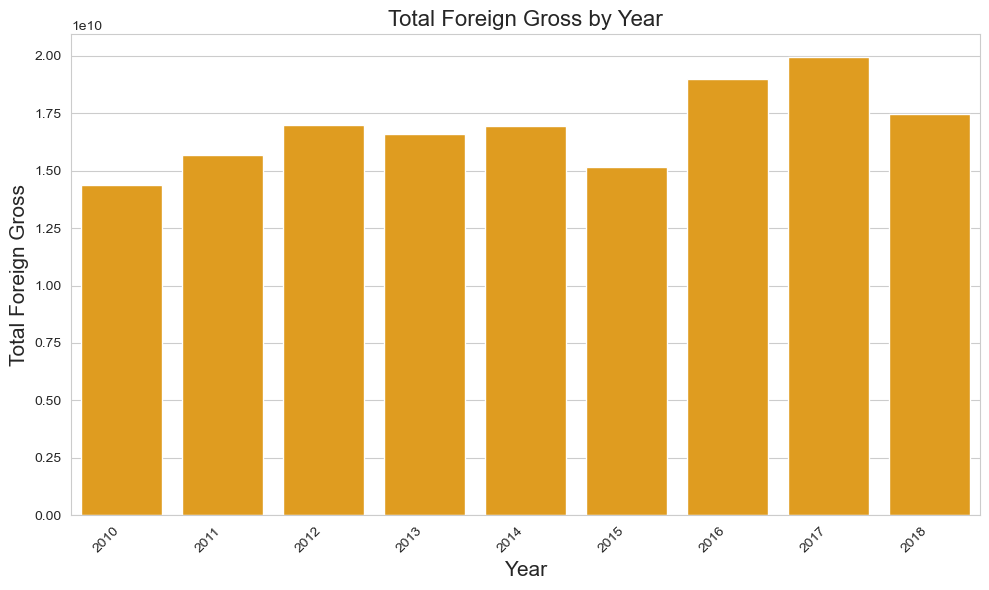

In [43]:




# Group by 'year' and calculate the sum of 'foreign_gross' for each year
yearly_foreign_gross = Movie_gross.groupby('year')['foreign_gross'].sum().reset_index()

# Set Seaborn style
sns.set_style("whitegrid")


# Plot the bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_foreign_gross, x='year', y='foreign_gross', color='orange')
plt.title('Total Foreign Gross by Year', fontsize=16)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total Foreign Gross', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




## A graph for domestic gross

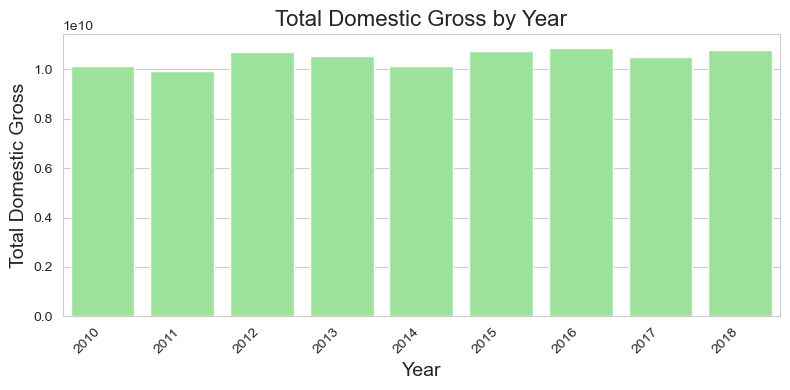

In [44]:
# Group by 'year' and calculate the sum of 'domestic_gross' for each year
yearly_domestic_gross = Movie_gross.groupby('year')['domestic_gross'].sum().reset_index()

# Set Seaborn style
sns.set_style("whitegrid")

# Plot the bar graph with Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(data=yearly_domestic_gross, x='year', y='domestic_gross', color='lightgreen')
plt.title('Total Domestic Gross by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Domestic Gross', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data 2

In [45]:
Roi = pd.read_csv('data/tn.movie_budgets.csv.gz')
Roi.head(15)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


##### The above dataset focuses on money spend and money made during production. The datset will be used to get the following:-
#####    1. Return On Ivestement
#####   2. Correlation between production_budget, domestic_gross, and worldwide_gross.

In [46]:
Roi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


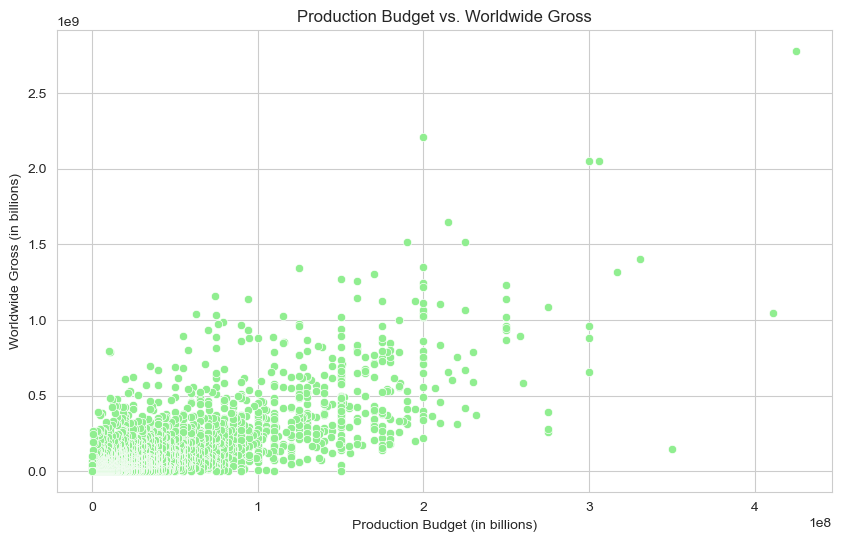

In [47]:
#Making a graph of production_budget against domestic_gross

# Convert budget and gross columns to numeric values
money_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for column in money_columns:
    Roi[column] = Roi[column].str.replace('$', '').str.replace(',', '').astype(float)

# Plot the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Roi, x='production_budget', y='worldwide_gross', color='lightgreen')
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget (in billions)')
plt.ylabel('Worldwide Gross (in billions)')
plt.show()

In [48]:
# Calculate the correlation between production budget and worldwide gross

correlation = Roi['production_budget'].corr(Roi['worldwide_gross'])

print("Correlation between Production Budget and Worldwide Gross:", correlation)

Correlation between Production Budget and Worldwide Gross: 0.7483059765694747


In [49]:
# Plot a scatter plot of domestic gross and worldwide gross

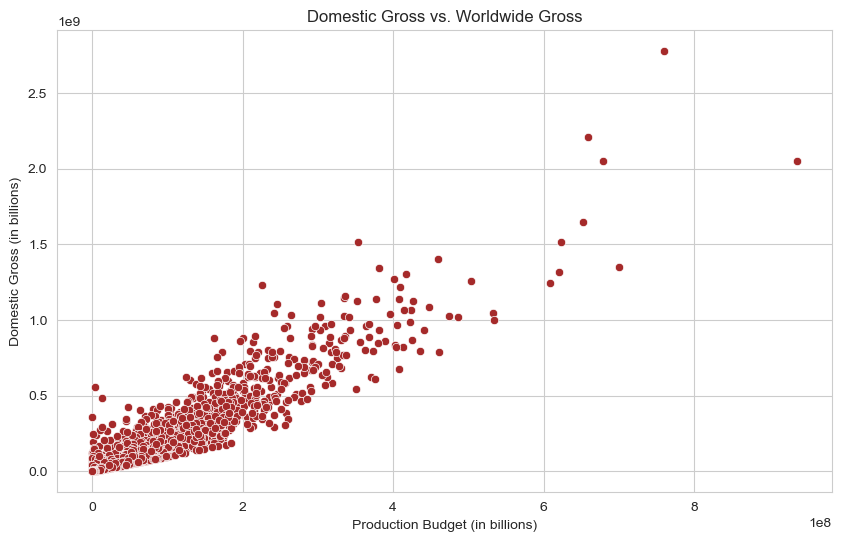

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Roi, x='domestic_gross', y='worldwide_gross', color='brown')
plt.title('Domestic Gross vs. Worldwide Gross')
plt.xlabel('Production Budget (in billions)')
plt.ylabel('Domestic Gross (in billions)')
plt.show()

In [51]:
# Calculate the correlation between domestic gross and worldwide gross

correlation = Roi['domestic_gross'].corr(Roi['worldwide_gross'])

print("Correlation between Domestic Gross and Worldwide Gross:", correlation)

Correlation between Domestic Gross and Worldwide Gross: 0.9388532353514973


## Data 3

In [52]:
bf_movies = pd.read_csv("data/rt.movie_info.tsv.gz", delimiter='\t', compression='gzip')
bf_movies.head(15)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [53]:
bf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


#### From the above data, we are able to :-
##### 1. Genres with higher ratings
##### 2. Most common genre.
##### 3. Genre popularity trends or patterns

In [54]:
# Most common genres
most_common_genres = bf_movies['genre'].value_counts().head(8)
print("The Most common genres:")
print(most_common_genres)
print()

The Most common genres:
genre
Drama                                              151
Comedy                                             110
Comedy|Drama                                        80
Drama|Mystery and Suspense                          67
Art House and International|Drama                   62
Action and Adventure|Drama                          42
Action and Adventure|Drama|Mystery and Suspense     40
Drama|Romance                                       35
Name: count, dtype: int64



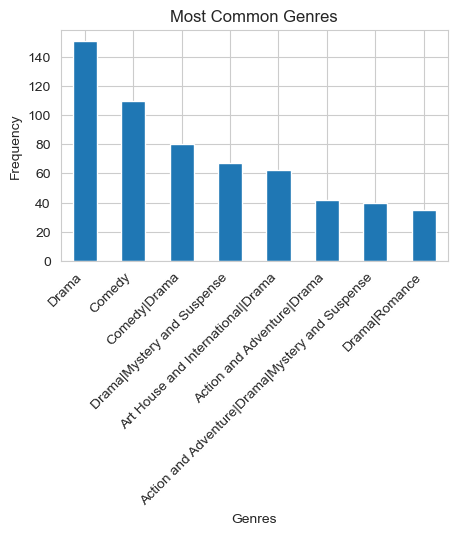

In [36]:
# Genre with highest popularity
plt.figure(figsize=(5, 3))
most_common_genres.plot(kind='bar')
plt.title('Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


##### From the above histogram, it is clear that most people tende to watch drama a lot.
##### Drama genre can be a good for a start as microsoft expounds towards other genres in the future